In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from google.colab import drive
drive.mount('/content/drive')
from glob import glob
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchsummary import summary
from fastai.metrics import accuracy
from fastai.vision import *
import numpy as np
!pip install fft-conv-pytorch
from fft_conv_pytorch import fft_conv, FFTConv2d

Mounted at /content/drive


In [ ]:
#Run only 1st time to download dataset into drive. Dont run if dataset is already downloaded to drive
# ! wget -P /content/drive/MyDrive https://github.com/muhammedtalo/COVID-19/archive/refs/heads/master.zip
# ! unzip -q /content/drive/MyDrive/master.zip -d /content/drive/MyDrive/Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# path = "/content/drive/MyDrive/covid-19_dataset_grayscale"
# np.random.seed(41)
# data = ImageDataBunch.from_folder(path, train="Train", valid ="Valid", valid_pct=0.2,ds_tfms=get_transforms(), size=(1,512,512), bs=16, num_workers=4).normalize()

In [ ]:
path = "/content/drive/MyDrive/Dataset/grain_dataset"
np.random.seed(41)
data = ImageDataBunch.from_folder(path, train="Train", valid ="Valid", valid_pct=0.2,ds_tfms=get_transforms(), size=(256,256), bs=16, num_workers=4).normalize()

In [ ]:
print (data.classes, data.c, len(data.train_ds), len(data.valid_ds))
print (data.train_ds.classes)
print (data.valid_ds.classes)

['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'mycria', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa'] 23 632 158
['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'mycria', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']
['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'mycria', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']


With FFT Conv Layers

In [ ]:
# def fft_conv_block(ni, nf, size=3, stride=1):
#     for_pad = lambda s: s if s > 2 else 3
#     return nn.Sequential(
#         FFTConv2d(ni, nf, kernel_size=size, stride=stride,
#                   padding=(for_pad(size) - 1)//2, bias=False), 
#         nn.BatchNorm2d(nf),
#         nn.LeakyReLU(negative_slope=0.1, inplace=True)  
#     )

# def conv_block(ni, nf, size=3, stride=1):
#     for_pad = lambda s: s if s > 2 else 3
#     return nn.Sequential(
#         nn.Conv2d(ni, nf, kernel_size=size, stride=stride,
#                   padding=(for_pad(size) - 1)//2, bias=False), 
#         nn.BatchNorm2d(nf),
#         nn.LeakyReLU(negative_slope=0.1, inplace=True)  
#     )

# def triple_conv(ni, nf, size=3):
#     return nn.Sequential(
#         conv_block(ni, nf,size),
#         conv_block(nf, ni, size=1),  
#         conv_block(ni, nf,size)
#     )
# def fft_triple_conv(ni, nf,size):
#     return nn.Sequential(
#         fft_conv_block(ni, nf,size),
#         conv_block(nf, ni, size=1),  
#         fft_conv_block(ni, nf, size)
#     )
# 21 17

In [ ]:


vgg_model = nn.Sequential(
    
    nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=2, stride=2), 

    nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),

    nn.MaxPool2d(kernel_size=2, stride=2), 

    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=2, stride=2), 
    
    # nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    # nn.ReLU(inplace=True),
    # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
    # nn.ReLU(inplace=True),
    # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
    # nn.ReLU(inplace=True),
    # nn.MaxPool2d(kernel_size=2, stride=2), 
    
    # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
    # nn.ReLU(inplace=True),
    # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
    # nn.ReLU(inplace=True),
    # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
    # nn.ReLU(inplace=True),
    # nn.MaxPool2d(kernel_size=2, stride=2), 

    nn.Flatten(),
    nn.Linear(65536, 512),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    # nn.Linear(4096, 4096),
    # nn.ReLU(inplace=True),
    # nn.Dropout(0.5),
    nn.Linear(512, 23)
)





In [ ]:
vgg_learn = Learner(data, vgg_model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
print(vgg_learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 256, 256]        224        True      
______________________________________________________________________
ReLU                 [8, 256, 256]        0          False     
______________________________________________________________________
Conv2d               [8, 256, 256]        584        True      
______________________________________________________________________
ReLU                 [8, 256, 256]        0          False     
______________________________________________________________________
MaxPool2d            [8, 128, 128]        0          False     
______________________________________________________________________
Conv2d               [16, 128, 128]       1,168      True      
______________________________________________________________________
ReLU                 [16, 128, 128]       0          False     
___________________________________________________

In [ ]:
import time
start = time.time()
vgg_learn.fit_one_cycle(100, max_lr=5e-3)
end = time.time()
print(end-start)

epoch,train_loss,valid_loss,accuracy,time
0,1.233572,1.058751,0.632911,00:12
1,1.285854,1.070978,0.689873,00:11
2,1.302689,1.001669,0.740506,00:09
3,1.284970,1.114622,0.626582,00:09
4,1.422536,1.282595,0.575949,00:09
5,1.469773,1.313241,0.563291,00:09
6,1.520977,1.457226,0.474684,00:09
7,1.499048,1.267293,0.613924,00:09
8,1.545097,1.424044,0.531646,00:09
9,1.584637,1.396705,0.531646,00:09


990.529468536377


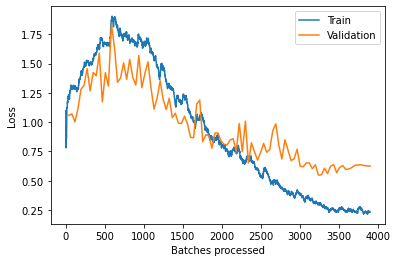

In [ ]:
vgg_learn.recorder.plot_losses()

In [ ]:
probs,targets = vgg_learn.get_preds(ds_type=DatasetType.Valid) 
accuracy(probs,targets)

tensor(0.8481)